In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Annotations

In [2]:
df = pd.read_csv('../annotations/surf.txt', sep='\t', header=None)

In [3]:
df.head() 

,0,1,2,3,4,5,6,7,8
0,default,NaN,00:00:00.018,0.018,00:02:24.237,144.237,00:02:24.219,144.219,c
1,default,NaN,00:02:26.801,146.801,00:02:27.044,147.044,00:00:00.243,0.243,a
2,default,NaN,00:02:30.407,150.407,00:02:30.600,150.600,00:00:00.193,0.193,b
3,default,NaN,00:02:32.654,152.654,00:02:32.968,152.968,00:00:00.314,0.314,a
4,default,NaN,00:02:34.260,154.260,00:02:34.705,154.705,00:00:00.445,0.445,a


In [4]:
df = df[[3, 5, 7, 8]]
df = df.rename(columns={3: 'start', 5: 'finish', 7: 'length', 8: 'label'})

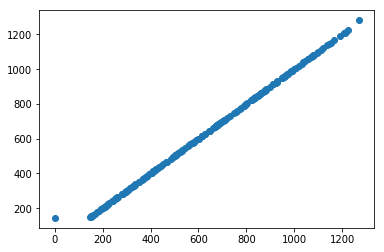

In [6]:
plt.scatter(df.start, df.finish)

# Audio

In [7]:
import glob
import os
import librosa
import numpy as np
from matplotlib.pyplot import specgram

In [8]:
audio, sr = librosa.load('../audio/surf.m4a')

In [9]:
def get_label_data(annotations, audio, label, sr):
    start_samples_indxs = librosa.time_to_samples(annotations[annotations.label == label].start.values, sr)
    finish_samples_indxs = librosa.time_to_samples(annotations[annotations.label == label].finish.values, sr)
    
    data = []
    for s, f in zip(start_samples_indxs, finish_samples_indxs):
        data.append(audio[np.arange(s, f)])
    return data

In [10]:
data_a = get_label_data(df, audio, 'a', sr)
merged_data_a = np.hstack(data_a)
librosa.output.write_wav('../demo/label_a.wav', merged_data_a, sr)

In [11]:
data_b = get_label_data(df, audio, 'b', sr)
merged_data_b = np.hstack(data_b)
librosa.output.write_wav('../demo/label_b.wav', merged_data_b, sr)